In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

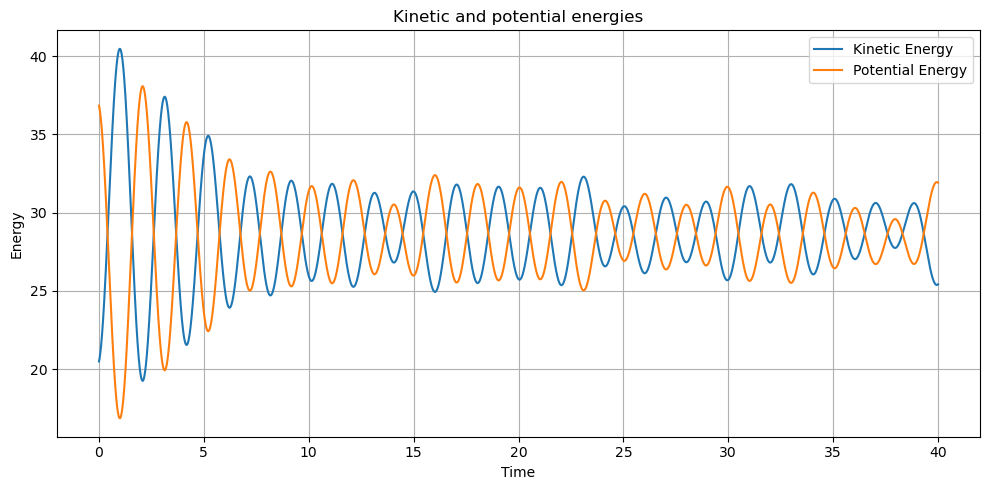

In [7]:
# Parameters
total_t = 40         # Total simulation time
dt = 0.0001            # Time step
num_steps = int(total_t / dt)

Np = 250              # Number of beads
T = 5e-2             # Temperature
me = 1.0              # Mass of each bead
hbar = 1.0            # Reduced Planck constant
gamma = 3              #For thermostat
sigma = np.sqrt(2 * gamma * T / me) 

# Spring constant from inter-bead harmonic potential
k_spring = T**2 * Np * me / hbar**2

# Initial positions and velocities (3D)
X = np.random.uniform(-0.5, 0.5, size=(Np, 3))
V = np.random.normal(0, scale=np.sqrt(T / me), size=(Np, 3))

# Energy tracking
kinetic_energy_list = []
potential_energy_list = []
total_energy_list = []
temperature_list = []

# Energy functions
def kinetic_energy(V):
    return 0.5 * me * np.sum(V**2)

def potential_energy(X):
    diffs = X - np.roll(X, 1, axis=0)  # Periodic difference
    r2 = np.sum(diffs**2, axis=1)
    return 0.5 * k_spring * np.sum(r2)

def compute_temperature(N,V): #3/2 * N * T = <KE> ----> T =  2/(3N) * <KE>
    Kinetic = kinetic_energy(V)
    T =  2/(3*N) * Kinetic
    return T 
    

# Velocity Verlet integration
for _ in range(num_steps):
    # Record energies
    KE = kinetic_energy(V)
    PE = potential_energy(X)
    kinetic_energy_list.append(KE)
    potential_energy_list.append(PE)
    total_energy_list.append(KE + PE)
    temperature_list.append(compute_temperature(Np,V)

    #Pick eta from a normal distribution 0 mean, std =1
    eta = np.random.normal(0,1)
    
    # Compute forces from springs
    F = -k_spring * (2 * X - np.roll(X, -1, axis=0) - np.roll(X, 1, axis=0)) +   +  sigma * eta

    # Update positions and velocities
    X_new = X + V * dt + 0.5 * F / me * dt**2
    F_new = -k_spring * (2 * X_new - np.roll(X_new, -1, axis=0) - np.roll(X_new, 1, axis=0))
    V_new = V + 0.5 * (F + F_new) / me * dt

    # Step forward
    X = X_new
    V = V_new




# Plot energy results
num_steps = int(total_t/dt)
time_steps = np.linspace(0, total_t, num_steps)
#time = np.arange(num_steps) * dt

plt.figure(figsize=(10, 5))
plt.plot(time_steps, kinetic_energy_list, label='Kinetic Energy')
plt.plot(time_steps, potential_energy_list, label='Potential Energy')
#plt.plot(time_steps, total_energy_list, label='Total Energy')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Kinetic and potential energies')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Energy')

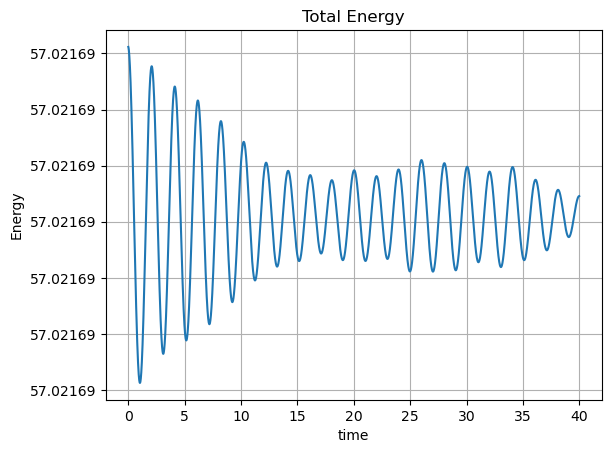

In [21]:
plt.plot(time_steps,total_energy_list)
plt.title('Total Energy')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.5f'))  # Controls decimal precision
plt.xlabel('time')
plt.ylabel('Energy')

In [5]:
K_avg = np.average(kinetic_energy_list)
#K = 3/2 * N * T
#T = 2/(3*N)

In [6]:
2/(3*Np)*K_avg

0.076349820505319

In [7]:
K_avg

28.631182689494622

In [ ]:
# when to apply thermostat ---> when the temperature exceeds +/- 5% of target temperature
# Langevin terms add to RHS of newtons laws. 
# Before force calculation check if T_sim = +/- 5% * T_target
# if within +/-5% ---> gamma = 0. If not within +/-5 % ----> run thermostat untill target temp. then turn off and keep integrating
